In [12]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import string

from collections import defaultdict 

In [13]:
def def_value(): 
    return []
allem=defaultdict(def_value)

In [14]:
dat=pd.read_csv("Data/RLM10122023.csv")
wls=dat.Wavelength
time='5min'
keepcols=[]
concs={}
for i in dat.columns:
    if time in i:
        conc=i.split("_")[0]
        allem[conc].append(dat[i])
        concs[i]=float(conc)

In [15]:
dat2=pd.read_csv("Data/10142023_expanded.csv")
wls=dat2.Wavelength
allem25p5=defaultdict(def_value)
allem5p5=defaultdict(def_value)
allem5p10=defaultdict(def_value)
Ethanol=defaultdict(def_value)
for i in dat2.columns:
    if 'Hg' in i:
        conc=float(i.split("_")[0])
        slit=i.split("_")[2]+"_"+i.split("_")[3]
        if(slit=="2.5_5"):
            allem25p5[conc].append(dat2[i])
        elif(slit=="5_5"):
            allem5p5[conc].append(dat2[i])
        elif(slit=="5_10"):
            allem5p10[conc].append(dat2[i])
    elif "Ethanol" in i:
        slit=i.split("_")[1]+"_"+i.split("_")[2]
        Ethanol[slit]=dat2[i]

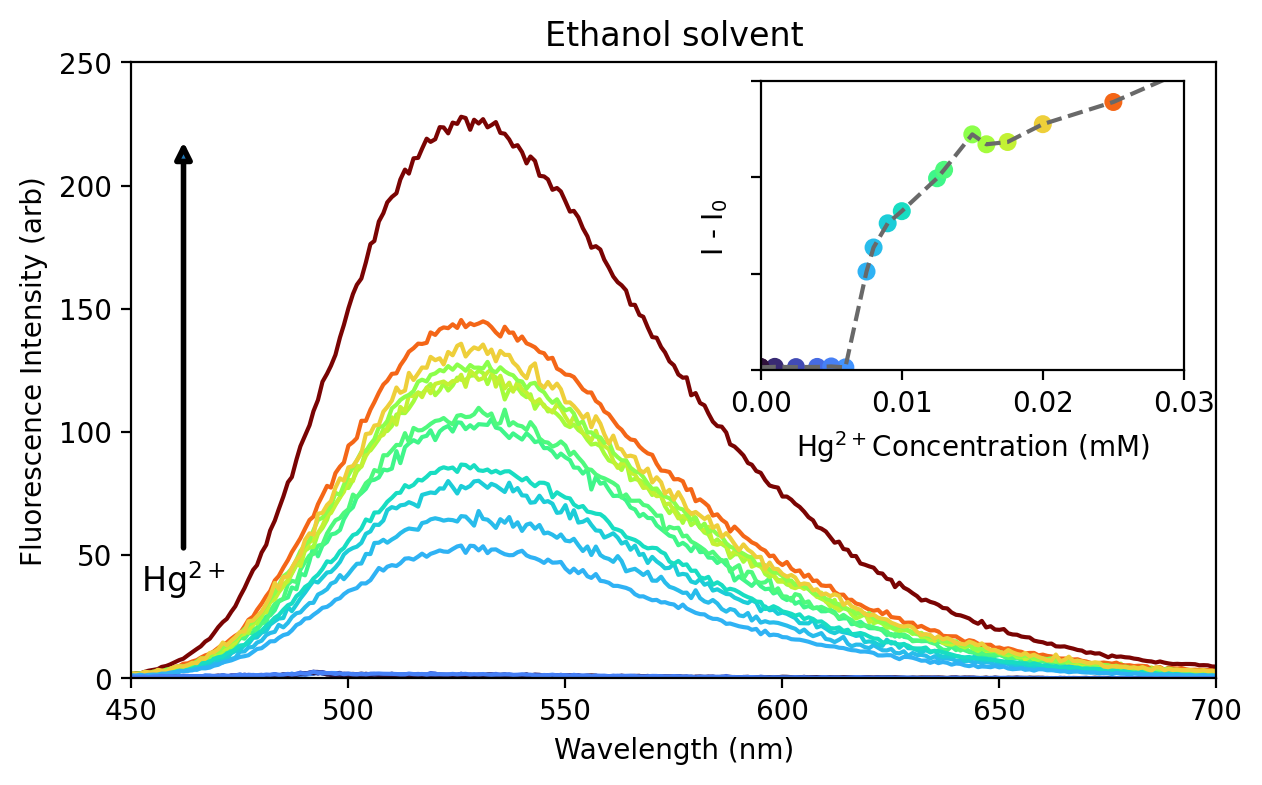

In [26]:
plt.figure(figsize=(7,4),dpi=200)

InsetX1=[]
InsetY1=[]
InsetCols1=[]
for i in allem25p5.keys():
    ave=(np.average(np.array(allem25p5[i]),axis=0))
    sd=(np.std(np.array(allem25p5[i]),axis=0))
    InsetX1.append(float(i))
    InsetY1.append(sum(ave[wls>450]))
    col = plt.cm.turbo(float(i)/0.032)
    InsetCols1.append(col)
    plt.plot(wls,ave,color=col)

for i in allem.keys():
    if(float(i)<0.06):
        ave=(np.average(np.array(allem[i]),axis=0))
        sd=(np.std(np.array(allem[i]),axis=0))
        col = plt.cm.turbo(float(i)/0.032)
        InsetX1.append(float(i))
        InsetY1.append(sum(ave[wls>450]))
        InsetCols1.append(col)
        plt.plot(wls,ave,color=col)
    
plt.xlim(450,700)
plt.ylim(0,250)
pylab.xlabel("Wavelength (nm)")
pylab.ylabel("Fluorescence Intensity (arb)")

ax = plt.gcf().gca()
ax.annotate('$\mathregular{Hg^{2+}}$', 
            xy=(462, 220),
            xycoords='data',
            xytext=(462, 40), 
            va='center',
            ha='center',
            fontsize=12,
            arrowprops={'arrowstyle': '-|>', 'lw': 2})
axins = ax.inset_axes(
    [0.58, 0.5, 0.39, 0.47],
    xlim=(0, 0.03), ylim=(0, 1.5e4),  yticklabels=[])
#axins.loglog()
#axins2 = inset_axes(ax, width="40%", height="50%", loc=1)
axins.scatter(InsetX1,InsetY1,c=InsetCols1,s=30)
axins.plot(np.sort(InsetX1),np.array(InsetY1)[np.argsort(InsetX1)],'--',color='dimgrey')
axins.set_xlabel("$\mathregular{Hg^{2+}}$Concentration (mM)")
axins.set_ylabel("I - $\mathregular{I_{0}}$ ")
plt.title("Ethanol solvent")
plt.savefig("Figs/Figure8.png",dpi=150,bbox_inches='tight')
plt.show()